# RF

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 3 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 3]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_3,sin_time,cos_time
1116,9.043323,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,0.0,...,141.152237,154.806868,129.044488,89.986054,0.076957,0.684638,0.072223,1,-0.965926,-0.258819
3745,6.088839,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,0.0,...,2936.215800,2985.174438,2898.281083,103.503641,0.274992,0.753250,0.254561,1,-0.965926,-0.258819
5409,8.094719,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,0.0,...,26762.246420,27056.350834,24252.617383,99.446719,0.476145,0.943513,0.474088,1,-0.500000,-0.866025
5414,8.001488,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,0.0,...,9383.749728,9504.425544,8736.247346,50.994814,0.172512,0.584785,0.161008,1,-0.500000,-0.866025
5418,8.062292,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,0.0,...,578.014621,598.699391,577.802421,104.418343,0.000000,0.091539,0.000000,1,-0.707107,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,12.711575,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,0.0,...,1848.262236,1869.723604,1697.162316,85.261099,0.015896,0.025341,0.014470,1,0.866025,0.500000
78380,12.316199,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,0.0,...,1648.870241,1812.208227,1552.672739,99.470423,0.132506,0.266973,0.128366,1,0.866025,0.500000
78381,13.253359,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,0.0,...,2592.916108,2826.084363,2496.994303,81.380582,0.146400,0.290531,0.139779,1,0.866025,0.500000
78382,12.313026,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,0.0,...,2718.073152,2943.844915,2491.009485,65.295172,0.077787,0.191556,0.070718,1,0.866025,0.500000


In [7]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [8]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000261424F3810>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026142B99210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026143E834D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026142BB4410>},
                   random_state=42, verbose=1)

In [9]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.96328086587844


In [10]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
15              Frequency  0.536612  0.966132                   10
13          VisibilityMax  0.540142  0.965685                   12
11          VisibilityMin  0.541688  0.965488                   14
8            WindSpeedMin  0.546170  0.964915                   17
14               Distance  0.547223  0.964780                   11
5        RainIntensityMin  0.547364  0.964761                   20
10          WindDirection  0.548948  0.964557                   15
12               cos_time  0.553734  0.963937                   13
0             Particulate  0.554639  0.963819                   25
7               WindSpeed  0.555594  0.963694                   18
4        RainIntensityMax  0.556100  0.963628                   21
23            Temperature  0.556631  0.963558                    2
1          ParticulateMax  0.557173  0.963487                   24
9            WindSpeedMax  0.557746  0.963412                 

In [11]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
15,Frequency,0.536612,0.966132,10
13,VisibilityMax,0.540142,0.965685,12
11,VisibilityMin,0.541688,0.965488,14
8,WindSpeedMin,0.546170,0.964915,17
14,Distance,0.547223,0.964780,11
5,RainIntensityMin,0.547364,0.964761,20
10,WindDirection,0.548948,0.964557,15
12,cos_time,0.553734,0.963937,13
0,Particulate,0.554639,0.963819,25
7,WindSpeed,0.555594,0.963694,18


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27188\2253993150.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


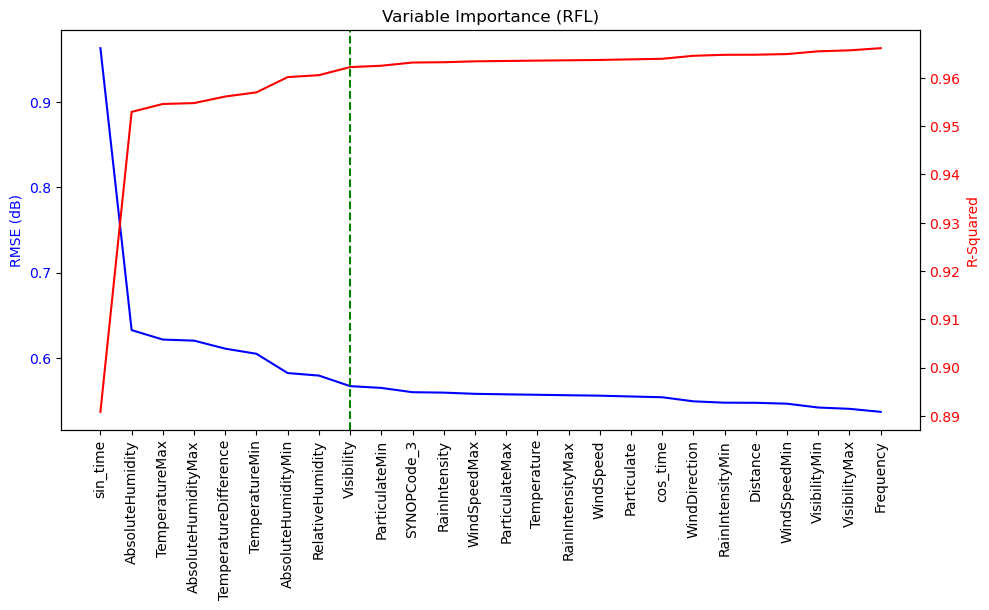

In [77]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 8
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance (RFL)')
plt.show()


In [55]:
selected_features_RFL= [
    'Visibility',
    'RelativeHumidity',
    'AbsoluteHumidityMin',
    'TemperatureMin',
    'TemperatureDifference',
    'AbsoluteHumidityMax',
    'TemperatureMax',
    'AbsoluteHumidity',
    'sin_time'
]

In [56]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.4606256727948388
Test R^2: 0.9803323020593844


In [ ]:
0.9803323020593844

# FSO

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 3 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 3]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_3,sin_time,cos_time
1116,13.997498,20.244567,20.819340,18.475689,2115.667536,83500000000,0.0,0.0,0.0,0.0,...,141.152237,154.806868,129.044488,89.986054,0.076957,0.684638,0.072223,1,-0.965926,-0.258819
3745,10.946154,20.164626,20.833908,19.261558,2119.138170,73500000000,0.0,0.0,0.0,0.0,...,2936.215800,2985.174438,2898.281083,103.503641,0.274992,0.753250,0.254561,1,-0.965926,-0.258819
5409,7.419227,17.515085,18.017632,16.110214,2962.180194,73500000000,0.0,0.0,0.0,0.0,...,26762.246420,27056.350834,24252.617383,99.446719,0.476145,0.943513,0.474088,1,-0.500000,-0.866025
5414,7.473629,17.796149,18.858701,17.232316,2964.409031,83500000000,0.0,0.0,0.0,0.0,...,9383.749728,9504.425544,8736.247346,50.994814,0.172512,0.584785,0.161008,1,-0.500000,-0.866025
5418,7.892708,17.943657,17.995399,16.521335,2963.216445,83500000000,0.0,0.0,0.0,0.0,...,578.014621,598.699391,577.802421,104.418343,0.000000,0.091539,0.000000,1,-0.707107,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78379,10.298313,4.636653,4.700021,4.519128,4825.164075,73500000000,0.0,0.0,0.0,0.0,...,1848.262236,1869.723604,1697.162316,85.261099,0.015896,0.025341,0.014470,1,0.866025,0.500000
78380,10.361821,4.588537,4.625096,4.318343,4827.289403,83500000000,0.0,0.0,0.0,0.0,...,1648.870241,1812.208227,1552.672739,99.470423,0.132506,0.266973,0.128366,1,0.866025,0.500000
78381,9.741072,4.727778,4.940151,4.540771,4818.044163,73500000000,0.0,0.0,0.0,0.0,...,2592.916108,2826.084363,2496.994303,81.380582,0.146400,0.290531,0.139779,1,0.866025,0.500000
78382,9.439828,4.697691,4.956181,4.630608,4823.899772,83500000000,0.0,0.0,0.0,0.0,...,2718.073152,2943.844915,2491.009485,65.295172,0.077787,0.191556,0.070718,1,0.866025,0.500000


In [26]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [27]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.2, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026148067010>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000261480B0590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026148B57FD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000261472204D0>},
                   random_state=42, verbose=1)

In [28]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.809417528399522


In [29]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
16               cos_time  2.398057  0.906026                    9
15               sin_time  2.406798  0.905340                   10
13         TemperatureMin  2.434969  0.903111                   12
14           WindSpeedMax  2.458009  0.901269                   11
18    AbsoluteHumidityMax  2.463034  0.900865                    7
19  TemperatureDifference  2.467288  0.900522                    6
17         TemperatureMax  2.470174  0.900289                    8
12    AbsoluteHumidityMin  2.472584  0.900095                   13
10           WindSpeedMin  2.481894  0.899341                   15
11       AbsoluteHumidity  2.486483  0.898968                   14
6             SYNOPCode_3  2.500400  0.897834                   19
3           RainIntensity  2.502283  0.897680                   22
0             Particulate  2.505427  0.897423                   25
20            Temperature  2.505589  0.897410                 

In [30]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
16,cos_time,2.398057,0.906026,9
15,sin_time,2.406798,0.905340,10
13,TemperatureMin,2.434969,0.903111,12
14,WindSpeedMax,2.458009,0.901269,11
18,AbsoluteHumidityMax,2.463034,0.900865,7
19,TemperatureDifference,2.467288,0.900522,6
17,TemperatureMax,2.470174,0.900289,8
12,AbsoluteHumidityMin,2.472584,0.900095,13
10,WindSpeedMin,2.481894,0.899341,15
11,AbsoluteHumidity,2.486483,0.898968,14


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27188\1066357725.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


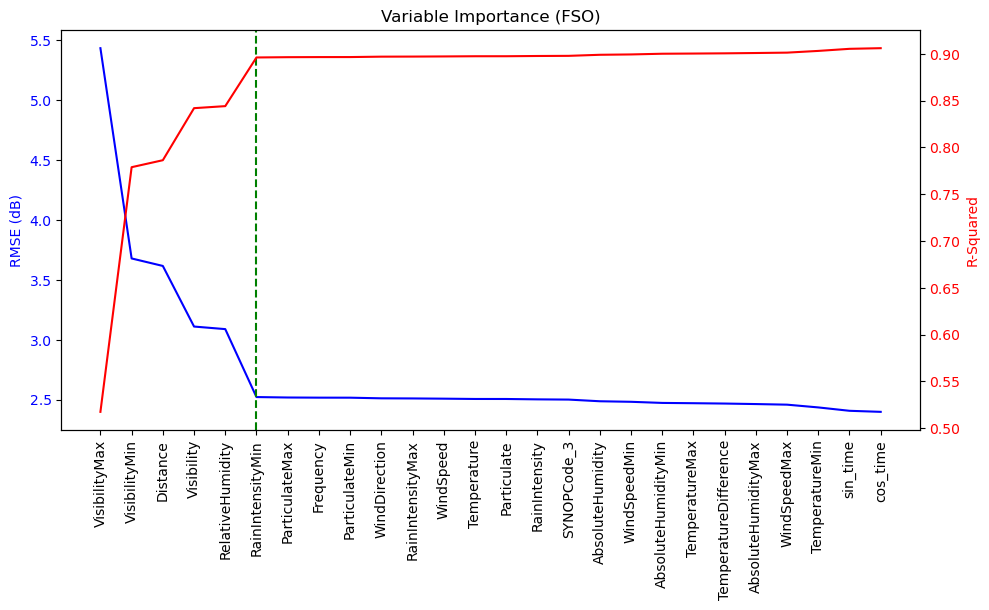

In [75]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 5
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')
fig.tight_layout()  # For better spacing
plt.title('Variable Importance (FSO)')

plt.show()


In [66]:
selected_features_FSO = [
    'RainIntensityMin', 
    'RelativeHumidity', 
    'Visibility',
    'Distance',
    'VisibilityMin',
    'VisibilityMax'
    # Add 'ParticulateMax' if you decide to keep it based on domain knowledge
]


In [67]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 3.174784108288356
Test R^2: 0.8843797937112798


# Plot

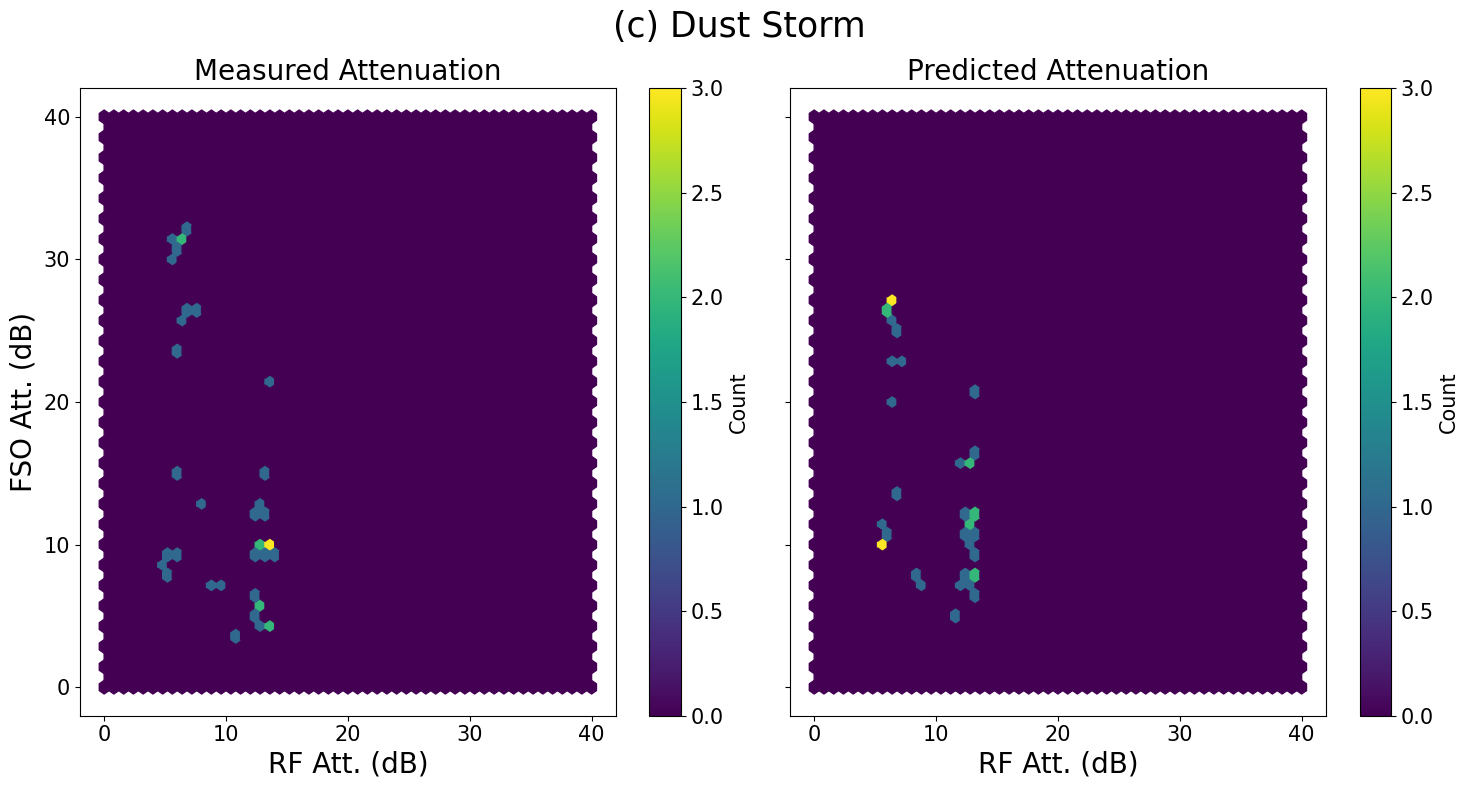

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(c) Dust Storm ',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27188\1756172510.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_27188\1756172510.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


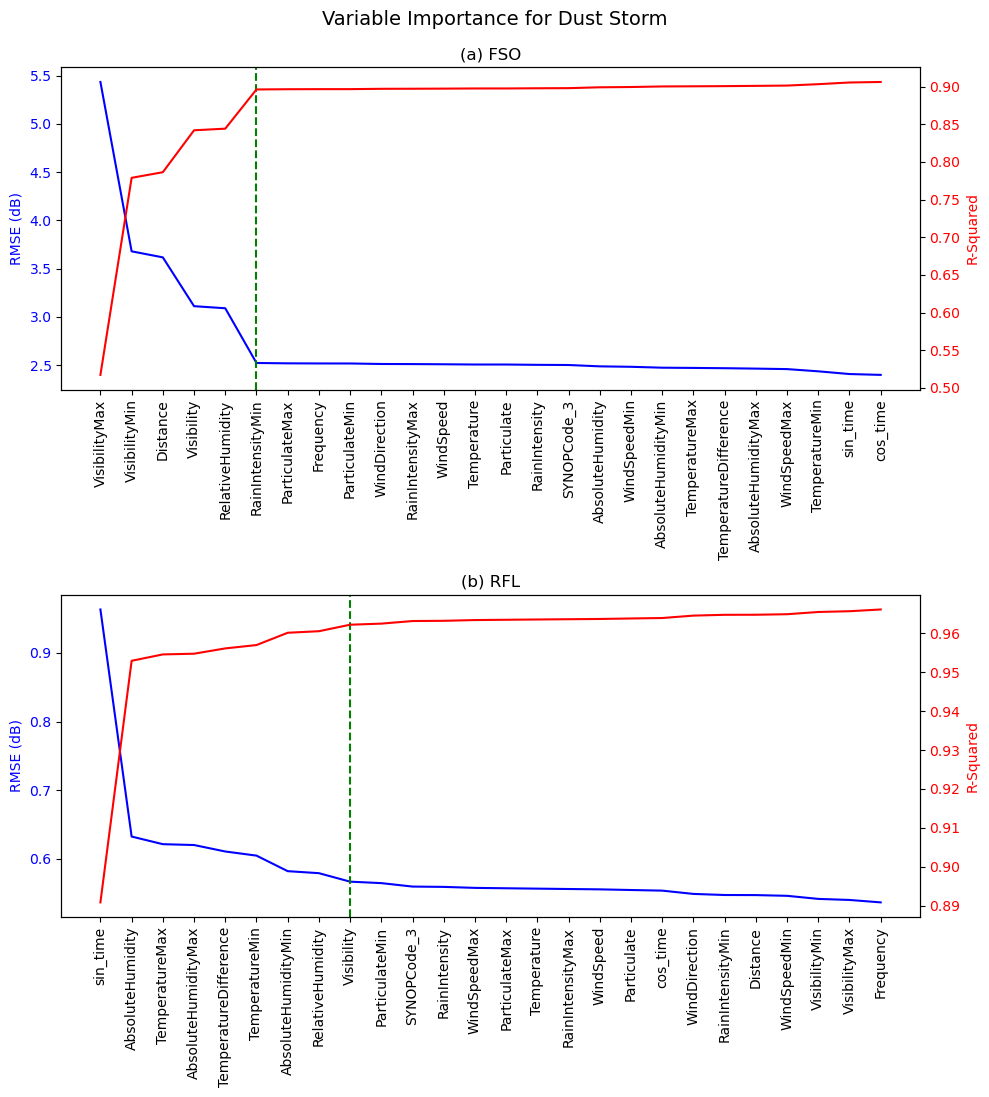

In [92]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 5  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 8  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Dust Storm', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
